In [1]:
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

<H2>Load Data</H2>

In [4]:
data = pd.read_parquet('../data/owf.Extract.01.parquet')

In [6]:
data.sample(5).T

DATE,1987-07-27,1917-10-17,1944-03-30,1923-10-03,2007-09-12
PRECIPITATION AMOUNT (mm),0.2,10.5,0.0,0.0,0.0
Q_RR,0,0,0,0,0
WIND GUST (m/s),12.9,NaN,NaN,NaN,10.4
Q_FX,0,<NA>,9,<NA>,0
MAXIMUM TEMPERATURE (C),19.7,NaN,-0.6,NaN,18.3
Q_TX,0,<NA>,0,<NA>,0
MEAN TEMPERATURE (C),15.5,NaN,-2.9,NaN,13.1
Q_TG,0,<NA>,0,<NA>,0
SEA LEVEL PRESSURE (hPa),998.4,NaN,NaN,NaN,1013.1
Q_PP,0,<NA>,9,<NA>,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44591 entries, 1899-12-01 to 2021-12-31
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PRECIPITATION AMOUNT (mm)  44285 non-null  float64
 1   Q_RR                       44316 non-null  Int64  
 2   WIND GUST (m/s)            14334 non-null  float64
 3   Q_FX                       32963 non-null  Int64  
 4   MAXIMUM TEMPERATURE (C)    30712 non-null  float64
 5   Q_TX                       30712 non-null  Int64  
 6   MEAN TEMPERATURE (C)       30740 non-null  float64
 7   Q_TG                       30740 non-null  Int64  
 8   SEA LEVEL PRESSURE (hPa)   23466 non-null  float64
 9   Q_PP                       30712 non-null  Int64  
 10  GLOBAL RADIATION (W/m2)    24172 non-null  float64
 11  Q_QQ                       25568 non-null  Int64  
 12  RELATIVE HUMIDITY          25658 non-null  float64
 13  Q_HU                       30

In [8]:
print('Number of duplicate dates:', data.index.duplicated().sum())

Number of duplicate dates: 0


In [9]:
qi = {'CLOUD COVER (okta)' : 'Q_CC',
      'WIND DIRECTION (degrees)' : 'Q_DD',
      'WIND SPEED (m/s)' : 'Q_FG',
      'WIND GUST (m/s)' : 'Q_FX',
      'RELATIVE HUMIDITY' : 'Q_HU',
      'SEA LEVEL PRESSURE (hPa)' : 'Q_PP',
      'GLOBAL RADIATION (W/m2)' : 'Q_QQ',
      'PRECIPITATION AMOUNT (mm)' : 'Q_RR',
      'SUNSHINE (hours)' : 'Q_SS',
      'MEAN TEMPERATURE (C)' : 'Q_TG',
      'MINIMUM TEMPERATURE (C)' : 'Q_TN',
      'MAXIMUM TEMPERATURE (C)' : 'Q_TX'}

In [10]:
(data[[*qi.values()]] == 1).sum(axis=0)

Q_CC     0
Q_DD    25
Q_FG     0
Q_FX     0
Q_HU     0
Q_PP     0
Q_QQ    24
Q_RR     0
Q_SS    31
Q_TG     3
Q_TN     3
Q_TX     0
dtype: Int64

In [11]:
suspected = {key : value for key, value in qi.items() if (data[value]==1).sum(axis=0) != 0}
suspected

{'WIND DIRECTION (degrees)': 'Q_DD',
 'GLOBAL RADIATION (W/m2)': 'Q_QQ',
 'SUNSHINE (hours)': 'Q_SS',
 'MEAN TEMPERATURE (C)': 'Q_TG',
 'MINIMUM TEMPERATURE (C)': 'Q_TN'}

<P>Let us find if are non-NA data with corresponding NA indicator values.</P>

In [12]:
{key : (data[value].isna() & data[key].notna()).sum() for key, value in suspected.items()}

{'WIND DIRECTION (degrees)': 0,
 'GLOBAL RADIATION (W/m2)': 0,
 'SUNSHINE (hours)': 0,
 'MEAN TEMPERATURE (C)': 0,
 'MINIMUM TEMPERATURE (C)': 0}

<P>Let's see where the suspected values lie in the data.</P>

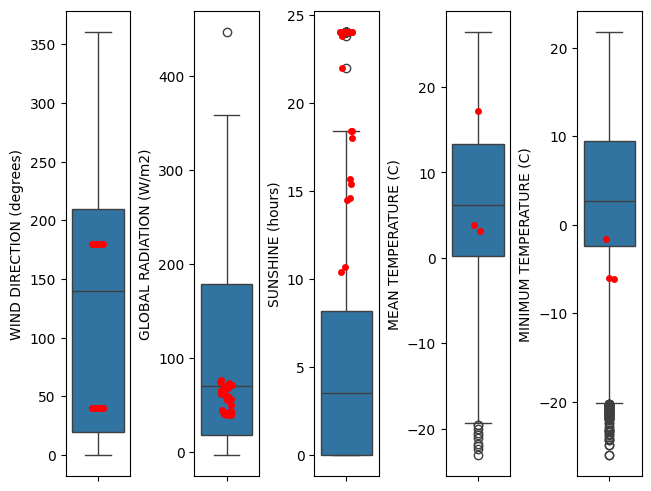

In [13]:
fig, axs = plt.subplots(nrows=1,
                        ncols=len(suspected),
                        layout='constrained')

for index, (key, value) in enumerate(suspected.items()):
    sns.boxplot(data=data,
                y=key,
                ax=axs[index])
    sns.stripplot(data[data[value]==1],
                  y=key,
                  color='red',
                  legend=False,
                  ax=axs[index])
plt.show()

<P>Except the Sunshine data rest of the data don't look extreme. Let's explore Sunshine data bit further.</P>

In [14]:
data[data['Q_SS']==1]['SUNSHINE (hours)']

DATE
2006-10-09    10.7
2006-10-10    15.7
2006-11-11    14.5
2006-11-12    24.0
2006-11-13    24.0
2006-11-14    24.0
2006-11-15    24.0
2006-11-16    24.0
2006-11-17    24.0
2006-11-18    24.0
2006-11-19    24.0
2006-11-20    24.0
2006-11-21    24.0
2006-11-22    24.0
2006-11-23    24.0
2006-11-24    24.0
2006-11-25    24.0
2006-11-26    24.0
2006-11-27    18.0
2006-11-29    14.6
2006-11-30    24.0
2006-12-01    24.0
2006-12-02    24.0
2006-12-03    24.0
2006-12-04    24.0
2006-12-05    23.8
2006-12-06    22.0
2006-12-07    10.4
2009-04-17    18.4
2009-09-09    15.4
2009-09-10    18.4
Name: SUNSHINE (hours), dtype: float64

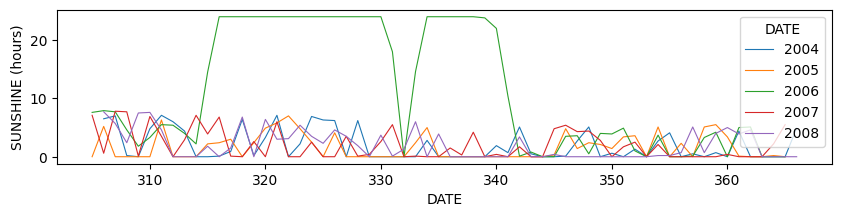

In [21]:
mask = (data.index.year > 2003) & (data.index.year < 2009) & (data.index.month > 10)

f = plt.figure(figsize=(10, 2))
g = sns.lineplot(data=data[mask],
                 x=data[mask].index.dayofyear,
                 y='SUNSHINE (hours)',
                 hue=data[mask].index.year,
                 palette='tab10',
                 linewidth=.8)
plt.show()

In [44]:
df = data.copy()

In [45]:
df.loc[data['Q_SS']==1, 'SUNSHINE (hours)'] = np.nan

In [46]:
df.drop(columns=[*qi.values()], inplace=True)

In [47]:
df.sample(5).T

DATE,1937-08-15,1981-06-07,2004-04-22,1981-06-06,1957-07-26
PRECIPITATION AMOUNT (mm),0.7,13.2,0.0,3.3,11.0
WIND GUST (m/s),NaN,NaN,6.7,NaN,NaN
MAXIMUM TEMPERATURE (C),19.8,15.7,11.7,17.0,19.6
MEAN TEMPERATURE (C),16.7,11.9,8.9,12.6,17.0
SEA LEVEL PRESSURE (hPa),NaN,1001.9,1018.8,1004.9,998.3
GLOBAL RADIATION (W/m2),NaN,219.0,108.0,206.0,75.0
RELATIVE HUMIDITY,NaN,86.0,69.0,72.0,84.0
WIND DIRECTION (degrees),0.0,120.0,10.0,180.0,190.0
SUNSHINE (hours),NaN,6.9,2.1,6.1,0.3
CLOUD COVER (okta),NaN,5.0,6.0,7.0,8.0


<H2>Fill in Missing Data</H2>

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44591 entries, 1899-12-01 to 2021-12-31
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PRECIPITATION AMOUNT (mm)  44285 non-null  float64
 1   WIND GUST (m/s)            14334 non-null  float64
 2   MAXIMUM TEMPERATURE (C)    30712 non-null  float64
 3   MEAN TEMPERATURE (C)       30740 non-null  float64
 4   SEA LEVEL PRESSURE (hPa)   23466 non-null  float64
 5   GLOBAL RADIATION (W/m2)    24172 non-null  float64
 6   RELATIVE HUMIDITY          25658 non-null  float64
 7   WIND DIRECTION (degrees)   30462 non-null  float64
 8   SUNSHINE (hours)           24031 non-null  float64
 9   CLOUD COVER (okta)         25658 non-null  float64
 10  MINIMUM TEMPERATURE (C)    30771 non-null  float64
 11  WIND SPEED (m/s)           25658 non-null  float64
dtypes: float64(12)
memory usage: 5.4 MB


In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRECIPITATION AMOUNT (mm),44285.0,2.012952,4.536088,0.0,0.0,0.0,1.8,72.8
WIND GUST (m/s),14334.0,9.407332,3.648416,1.0,6.7,9.3,11.6,28.8
MAXIMUM TEMPERATURE (C),30712.0,10.130001,9.356977,-20.5,2.6,10.0,18.0,34.6
MEAN TEMPERATURE (C),30740.0,6.250553,8.361652,-23.1,0.2,6.2,13.3,26.4
SEA LEVEL PRESSURE (hPa),23466.0,1011.637672,12.102957,954.5,1004.1,1012.1,1019.8,1053.4
GLOBAL RADIATION (W/m2),24172.0,105.213925,97.628581,-3.0,18.0,70.0,179.0,446.0
RELATIVE HUMIDITY,25658.0,73.693624,15.968670,18.0,62.0,76.0,87.0,100.0
WIND DIRECTION (degrees),30462.0,125.577671,106.451291,0.0,20.0,140.0,210.0,360.0
SUNSHINE (hours),24031.0,4.621302,4.670334,0.0,0.0,3.5,8.2,17.5
CLOUD COVER (okta),25658.0,5.420142,2.343191,0.0,4.0,6.0,8.0,8.0


In [50]:
df.isna().sum()

PRECIPITATION AMOUNT (mm)      306
WIND GUST (m/s)              30257
MAXIMUM TEMPERATURE (C)      13879
MEAN TEMPERATURE (C)         13851
SEA LEVEL PRESSURE (hPa)     21125
GLOBAL RADIATION (W/m2)      20419
RELATIVE HUMIDITY            18933
WIND DIRECTION (degrees)     14129
SUNSHINE (hours)             20560
CLOUD COVER (okta)           18933
MINIMUM TEMPERATURE (C)      13820
WIND SPEED (m/s)             18933
dtype: int64

In [51]:
df[df.isna().all(axis=1)].index.year.value_counts()

DATE
2021    275
1899     30
Name: count, dtype: int64

In [52]:
df.isna().all(axis=0)

PRECIPITATION AMOUNT (mm)    False
WIND GUST (m/s)              False
MAXIMUM TEMPERATURE (C)      False
MEAN TEMPERATURE (C)         False
SEA LEVEL PRESSURE (hPa)     False
GLOBAL RADIATION (W/m2)      False
RELATIVE HUMIDITY            False
WIND DIRECTION (degrees)     False
SUNSHINE (hours)             False
CLOUD COVER (okta)           False
MINIMUM TEMPERATURE (C)      False
WIND SPEED (m/s)             False
dtype: bool

In [53]:
mask = (df.index.year > 1979) & (df.index.year < 2021)
df = df[mask]

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14976 entries, 1980-01-01 to 2020-12-31
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PRECIPITATION AMOUNT (mm)  14976 non-null  float64
 1   WIND GUST (m/s)            14244 non-null  float64
 2   MAXIMUM TEMPERATURE (C)    14976 non-null  float64
 3   MEAN TEMPERATURE (C)       14976 non-null  float64
 4   SEA LEVEL PRESSURE (hPa)   14976 non-null  float64
 5   GLOBAL RADIATION (W/m2)    14043 non-null  float64
 6   RELATIVE HUMIDITY          14976 non-null  float64
 7   WIND DIRECTION (degrees)   14816 non-null  float64
 8   SUNSHINE (hours)           13902 non-null  float64
 9   CLOUD COVER (okta)         14976 non-null  float64
 10  MINIMUM TEMPERATURE (C)    14976 non-null  float64
 11  WIND SPEED (m/s)           14976 non-null  float64
dtypes: float64(12)
memory usage: 1.5 MB


In [55]:
columns = ['WIND DIRECTION (degrees)',
           'WIND GUST (m/s)',
           'GLOBAL RADIATION (W/m2)']

In [56]:
df[columns] = df[columns].fillna(df[columns].median())

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14976 entries, 1980-01-01 to 2020-12-31
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PRECIPITATION AMOUNT (mm)  14976 non-null  float64
 1   WIND GUST (m/s)            14976 non-null  float64
 2   MAXIMUM TEMPERATURE (C)    14976 non-null  float64
 3   MEAN TEMPERATURE (C)       14976 non-null  float64
 4   SEA LEVEL PRESSURE (hPa)   14976 non-null  float64
 5   GLOBAL RADIATION (W/m2)    14976 non-null  float64
 6   RELATIVE HUMIDITY          14976 non-null  float64
 7   WIND DIRECTION (degrees)   14976 non-null  float64
 8   SUNSHINE (hours)           13902 non-null  float64
 9   CLOUD COVER (okta)         14976 non-null  float64
 10  MINIMUM TEMPERATURE (C)    14976 non-null  float64
 11  WIND SPEED (m/s)           14976 non-null  float64
dtypes: float64(12)
memory usage: 1.5 MB


In [58]:
df.corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,PRECIPITATION AMOUNT (mm),WIND GUST (m/s),MAXIMUM TEMPERATURE (C),MEAN TEMPERATURE (C),SEA LEVEL PRESSURE (hPa),GLOBAL RADIATION (W/m2),RELATIVE HUMIDITY,WIND DIRECTION (degrees),SUNSHINE (hours),CLOUD COVER (okta),MINIMUM TEMPERATURE (C),WIND SPEED (m/s)
PRECIPITATION AMOUNT (mm),1.00,0.10,0.03,0.08,-0.25,-0.17,0.32,-0.10,-0.29,0.35,0.14,0.10
WIND GUST (m/s),0.10,1.00,0.14,0.15,-0.31,0.10,-0.30,0.00,0.06,-0.01,0.17,0.73
MAXIMUM TEMPERATURE (C),0.03,0.14,1.00,0.98,0.02,0.75,-0.39,0.22,0.58,-0.18,0.92,0.05
MEAN TEMPERATURE (C),0.08,0.15,0.98,1.00,-0.02,0.67,-0.30,0.18,0.47,-0.06,0.97,0.09
SEA LEVEL PRESSURE (hPa),-0.25,-0.31,0.02,-0.02,1.00,0.16,-0.18,-0.04,0.23,-0.23,-0.08,-0.22
GLOBAL RADIATION (W/m2),-0.17,0.10,0.75,0.67,0.16,1.00,-0.65,0.18,0.87,-0.45,0.55,0.06
RELATIVE HUMIDITY,0.32,-0.30,-0.39,-0.30,-0.18,-0.65,1.00,-0.13,-0.72,0.60,-0.18,-0.24
WIND DIRECTION (degrees),-0.10,0.00,0.22,0.18,-0.04,0.18,-0.13,1.00,0.23,-0.19,0.13,-0.17
SUNSHINE (hours),-0.29,0.06,0.58,0.47,0.23,0.87,-0.72,0.23,1.00,-0.74,0.32,-0.01
CLOUD COVER (okta),0.35,-0.01,-0.18,-0.06,-0.23,-0.45,0.60,-0.19,-0.74,1.00,0.07,0.11


In [59]:
columns = ['CLOUD COVER (okta)',
           'RELATIVE HUMIDITY',
           'GLOBAL RADIATION (W/m2)',
           'MAXIMUM TEMPERATURE (C)',
           'SUNSHINE (hours)']

mask = df[columns].notna().all(axis=1)

X = df.loc[mask, columns[:-1]].values
y = df.loc[mask, columns[-1]].values
lm = LinearRegression().fit(X, y)

mask = df['SUNSHINE (hours)'].isna()
df.loc[mask, 'SUNSHINE (hours)'] = lm.predict(df.loc[mask, columns[:-1]].values)

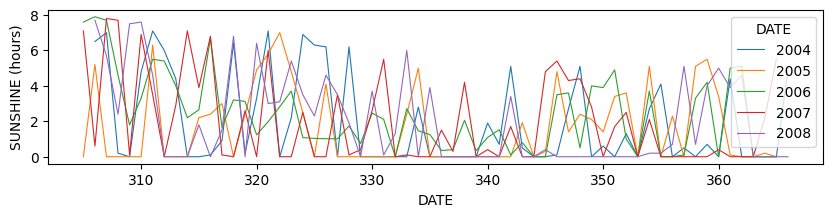

In [61]:
f = plt.figure(figsize=(10, 2))
g = sns.lineplot(data=df[mask],
                 x=df[mask].index.dayofyear,
                 y='SUNSHINE (hours)',
                 hue=df[mask].index.year,
                 palette='tab10',
                 linewidth=.8)
plt.show()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14976 entries, 1980-01-01 to 2020-12-31
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PRECIPITATION AMOUNT (mm)  14976 non-null  float64
 1   WIND GUST (m/s)            14976 non-null  float64
 2   MAXIMUM TEMPERATURE (C)    14976 non-null  float64
 3   MEAN TEMPERATURE (C)       14976 non-null  float64
 4   SEA LEVEL PRESSURE (hPa)   14976 non-null  float64
 5   GLOBAL RADIATION (W/m2)    14976 non-null  float64
 6   RELATIVE HUMIDITY          14976 non-null  float64
 7   WIND DIRECTION (degrees)   14976 non-null  float64
 8   SUNSHINE (hours)           14976 non-null  float64
 9   CLOUD COVER (okta)         14976 non-null  float64
 10  MINIMUM TEMPERATURE (C)    14976 non-null  float64
 11  WIND SPEED (m/s)           14976 non-null  float64
dtypes: float64(12)
memory usage: 1.5 MB


In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRECIPITATION AMOUNT (mm),14976.0,2.270593,4.955477,0.000000,0.0,0.0,2.20,72.800000
WIND GUST (m/s),14976.0,9.409635,3.558204,1.000000,7.0,9.3,11.30,28.800000
MAXIMUM TEMPERATURE (C),14976.0,10.574446,9.169901,-20.500000,3.2,10.4,18.20,34.600000
MEAN TEMPERATURE (C),14976.0,6.705576,8.117707,-22.000000,0.7,6.6,13.50,25.900000
SEA LEVEL PRESSURE (hPa),14976.0,1011.397823,12.179432,954.500000,1003.9,1011.9,1019.50,1053.400000
GLOBAL RADIATION (W/m2),14976.0,102.866386,94.678592,-3.000000,20.0,70.0,171.25,446.000000
RELATIVE HUMIDITY,14976.0,72.909455,16.140504,19.000000,62.0,76.0,86.00,100.000000
WIND DIRECTION (degrees),14976.0,157.045740,93.349283,0.000000,60.0,188.0,220.00,360.000000
SUNSHINE (hours),14976.0,4.569589,4.538858,-1.039634,0.0,3.4,7.90,18.216231
CLOUD COVER (okta),14976.0,5.475294,2.259269,0.000000,4.0,6.0,8.00,8.000000


<H2>Encoding</H2>

<H3>Wind Direction</H3>

In [64]:
wind_direction = pd.cut(df['WIND DIRECTION (degrees)'],
                        bins=np.linspace(-11.25, 371.25, 18),
                        labels=['N', 'NNE', 'NE', 'ENE', 'E', 'ESE',  'SE',  'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW', 'N'],
                        include_lowest=True, right=False,
                        ordered=False)
one_hot_wind_direction = pd.get_dummies(wind_direction, dtype=int)

In [65]:
df = pd.concat([df, one_hot_wind_direction], axis=1)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14976 entries, 1980-01-01 to 2020-12-31
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PRECIPITATION AMOUNT (mm)  14976 non-null  float64
 1   WIND GUST (m/s)            14976 non-null  float64
 2   MAXIMUM TEMPERATURE (C)    14976 non-null  float64
 3   MEAN TEMPERATURE (C)       14976 non-null  float64
 4   SEA LEVEL PRESSURE (hPa)   14976 non-null  float64
 5   GLOBAL RADIATION (W/m2)    14976 non-null  float64
 6   RELATIVE HUMIDITY          14976 non-null  float64
 7   WIND DIRECTION (degrees)   14976 non-null  float64
 8   SUNSHINE (hours)           14976 non-null  float64
 9   CLOUD COVER (okta)         14976 non-null  float64
 10  MINIMUM TEMPERATURE (C)    14976 non-null  float64
 11  WIND SPEED (m/s)           14976 non-null  float64
 12  E                          14976 non-null  int64  
 13  ENE                        14

<H3>Cloud Cover</H3>

In [67]:
df['CLOUD COVER (okta)'] = df['CLOUD COVER (okta)'].astype(int)

In [68]:
one_hot_oktas = pd.get_dummies(df['CLOUD COVER (okta)'], prefix='OKTA', prefix_sep=' ', dtype=int)

In [69]:
df = pd.concat([df, one_hot_oktas], axis=1)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14976 entries, 1980-01-01 to 2020-12-31
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PRECIPITATION AMOUNT (mm)  14976 non-null  float64
 1   WIND GUST (m/s)            14976 non-null  float64
 2   MAXIMUM TEMPERATURE (C)    14976 non-null  float64
 3   MEAN TEMPERATURE (C)       14976 non-null  float64
 4   SEA LEVEL PRESSURE (hPa)   14976 non-null  float64
 5   GLOBAL RADIATION (W/m2)    14976 non-null  float64
 6   RELATIVE HUMIDITY          14976 non-null  float64
 7   WIND DIRECTION (degrees)   14976 non-null  float64
 8   SUNSHINE (hours)           14976 non-null  float64
 9   CLOUD COVER (okta)         14976 non-null  int64  
 10  MINIMUM TEMPERATURE (C)    14976 non-null  float64
 11  WIND SPEED (m/s)           14976 non-null  float64
 12  E                          14976 non-null  int64  
 13  ENE                        14

In [71]:
df.head().T

DATE,1980-01-01,1980-01-02,1980-01-03,1980-01-04,1980-01-05
PRECIPITATION AMOUNT (mm),0.0,0.0,0.0,1.4,3.2
WIND GUST (m/s),9.3,9.3,9.3,9.3,9.3
MAXIMUM TEMPERATURE (C),-3.1,-4.3,-6.3,-13.5,-4.8
MEAN TEMPERATURE (C),-3.7,-6.2,-11.5,-15.2,-7.2
SEA LEVEL PRESSURE (hPa),1003.8,1016.7,1021.0,1017.3,1013.0
GLOBAL RADIATION (W/m2),14.0,17.0,18.0,11.0,5.0
RELATIVE HUMIDITY,64.0,55.0,68.0,69.0,72.0
WIND DIRECTION (degrees),20.0,20.0,0.0,0.0,30.0
SUNSHINE (hours),3.3,4.6,5.1,1.6,0.0
CLOUD COVER (okta),5.0,1.0,0.0,3.0,8.0


In [72]:
df.to_parquet('../data/owf.EDA.1980-2020.01.parquet', index=True)